In [1]:
import pandas as pd
df = pd.read_csv("train.csv")

In [2]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df1 = pd.read_csv("stores.csv")

In [4]:
df1.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [5]:
temp_df = df[df["Store"] == 1]

In [6]:
temp_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


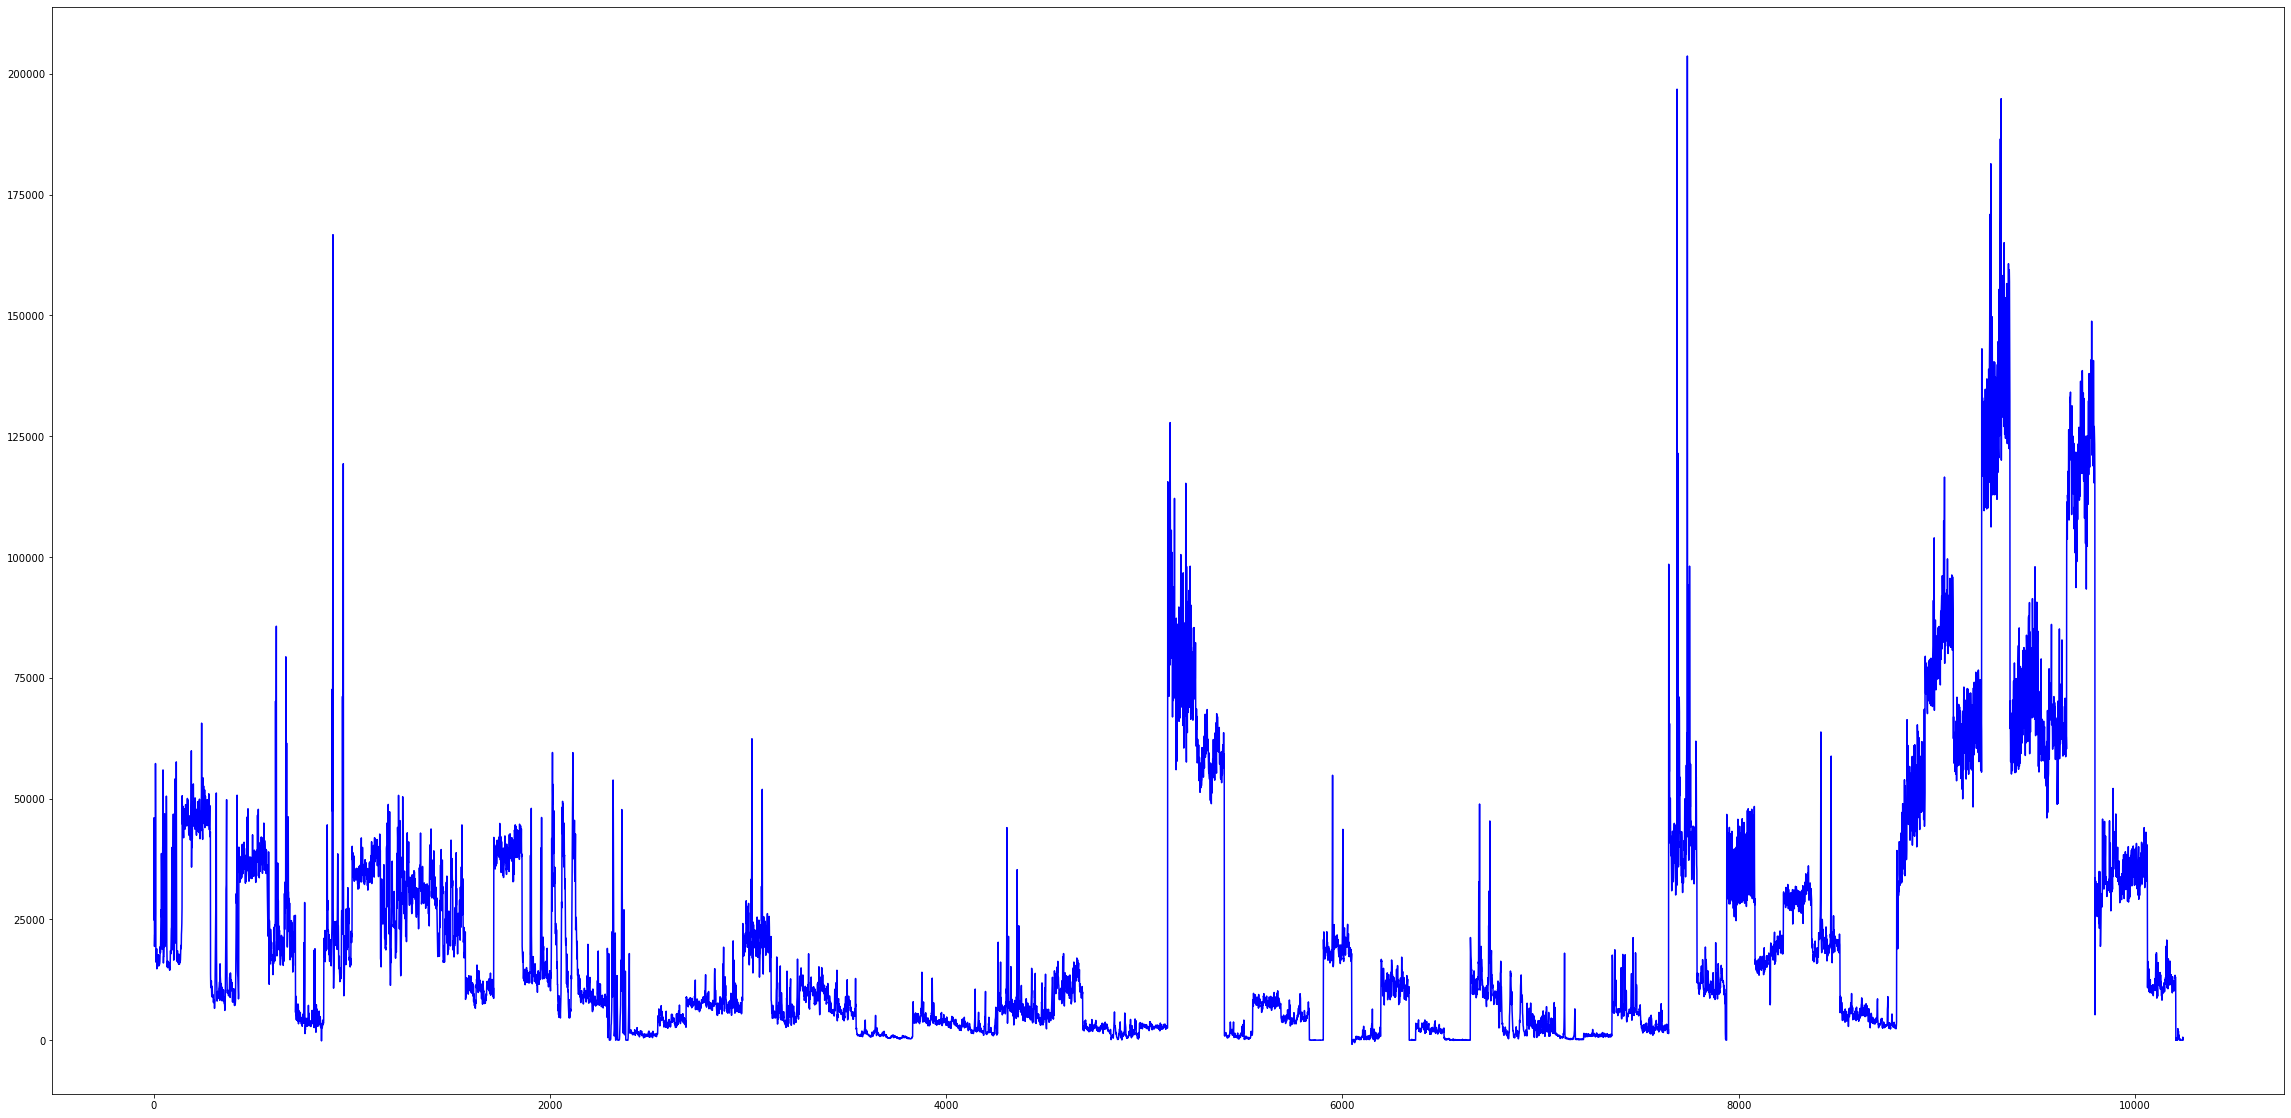

In [7]:
import matplotlib.pyplot as plt
K = []
for i in range(len(temp_df)):
    K.append(i)
plt.figure(figsize = (40,20))
plt.plot(K,temp_df["Weekly_Sales"],color = 'b')

In [8]:
temp_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [9]:
temp_df.dtypes

Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
IsHoliday          bool
dtype: object

In [13]:
temp_df["Date"] = pd.to_datetime(temp_df["Date"])

<ipython-input-13-d1b1abd8c9d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["Date"] = pd.to_datetime(temp_df["Date"])


In [19]:
type(temp_df["Date"][0].year)

int

In [23]:
K = []
for i in range(len(temp_df)):
    K.append(temp_df["Date"][i].year)

In [24]:
len(K) == len(temp_df)

True

In [25]:
temp_df["year"] = K

<ipython-input-25-00325a1d735d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df["year"] = K


In [26]:
temp_df.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'year'], dtype='object')

In [27]:
cycle1 = temp_df[temp_df["year"] == 2010]

In [30]:
cycle1.sort_values(by = "Date")

,Store,Dept,Date,Weekly_Sales,IsHoliday,year
0,1,1,2010-02-05,24924.50,False,2010
5690,1,44,2010-02-05,4674.75,False,2010
5833,1,45,2010-02-05,37.44,False,2010
5904,1,46,2010-02-05,20837.77,False,2010
715,1,6,2010-02-05,5749.03,False,2010
...,...,...,...,...,...,...
5308,1,40,2010-12-31,58568.16,True,2010
4164,1,31,2010-12-31,2286.59,True,2010
905,1,7,2010-12-31,27433.06,True,2010
7408,1,67,2010-12-31,4774.05,True,2010


In [31]:
cycle1.to_csv("cycle1/cycle1.csv")

In [34]:
T = cycle1.groupby("Date")["Weekly_Sales"].sum()

In [37]:
type(T)

pandas.core.series.Series

In [41]:
len(list(T))

48

In [42]:
y = []
x = []
for i in range(len(T)) :
    y.append(T[i])
    x.append(i)

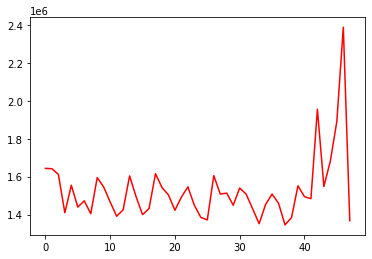

In [44]:
plt.plot(x,y,color = 'r')

In [46]:
import numpy as np
np.save("cycle1/y_cumilative",np.array(y))